**<h2 align="center">Osiri University_Data Science and Analytics_Final Project</h2>**


### **Group 5 Members**


<div style="float:left; text-align:left; width:auto;">
  <table style="margin:0 !important; text-align:left !important;">
    <tr><th>Names</th><th>Emails</th><th>Phone Number</th></tr>
    <tr><td>Adejare Ezekiel Sanyaolu</td><td>adesanyaolu@osiriuniversity.org</td><td>+2348029294667</td></tr>
    <tr><td>Celestin Nkeramihigo</td><td>celestin@osiriuniversity.org</td><td>+250781078339</td></tr>
    <tr><td>Chukwudi Iwundu Paschal</td><td>ciwundu@osiriuniversity.org</td><td>+2348025130564</td></tr>
    <tr><td>Onisotoyin Opia</td><td>onisopia@osiriuniversity.org</td><td>+2349073308646</td></tr>
    <tr><td>Idrissa Diouf</td><td>idiouf@osiriuniversity.org</td><td>+221777894316</td></tr>
    <tr><td>Jide Gboyega Okedeji</td><td>jide@osiriuniversity.org</td><td>+2347038024827</td></tr>
    <tr><td>Mekdes Teka</td><td>Meteka@Osiriuniversity.org</td><td>+17026376777</td></tr>
  </table>
</div>
<div style="clear:both;"></div>


<style>
.rendered_html table{margin-left:0 !important;margin-right:auto !important}
.rendered_html th,.rendered_html td{text-align:left !important}
.jp-RenderedHTMLCommon table{margin-left:0 !important;margin-right:auto !important}
.jp-RenderedHTMLCommon th,.jp-RenderedHTMLCommon td{text-align:left !important}
</style>


**<h3 align="center">Sales and Revenue Analytics and Forecasting for Strategic Business Insights</h3>**


### **1. Introduction**


### **1.1 Project Description**


This project intends to utilize machine learning models to analyze sales and revenue of the business of the purpose of the business decisions. By using predictive, prescriptive, and time series, the machine learning models will help to better understand data, predict the revenue and sales using historical data and make critical business decisions through the use of prescriptive approach and forecasting of the revenue over the next months.


### **1.2 Project Objectives**


This project intends to achieve the following objectives:

- Develop and evaluate a machine learning model that predicts monthly units sold with an R² score ≥ 0.85 using historical features.
- Create a time series model that forecasts monthly revenue for the next 12 months using past records.
- Analyze the relationship between unit price and revenue to identify the optimal price point that maximizes total revenue across different product categories.


### **1.3 Dataset Description**


This project uses a dataset that has details about sales transactions, and others details like the customer's age, gender, location, and the products sold. Due to the purpose of making informed business decisions, the dataset has cost of the product and the revenue generated from its sale, which allows the calculation of profit and profit margins for the business. With the possession of both qualitative and quantitative data, the dataset allows different types of data analysis and it can lead to important decisions in relations to the business purposes. The dataset has 15 columns representing index, date, year, month, customer age, customer gender, country, state, product category, sub category, quantity, unit cost, unit price, cost, and revenue. With 34,865 rows, the dataset gives the opportunity to make all necessary analysis and make informed decisions.


### **2. Data Pipeline & Preparation**


### **2.1 Data Acquisition**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Added this import
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.tsa.arima.model import ARIMA

from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from prophet import Prophet
import warnings

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Group 5-Dataset for Final Project.csv to Group 5-Dataset for Final Project.csv


### **2.2 Read the Data and Show the Data Head**


In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Group 5-Dataset for Final Project.csv")
df.head(10)

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
5,5,4/8/2016,2016.0,April,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,66.00,78.000000,66.0,78.0
6,6,4/17/2016,2016.0,April,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,52.00,60.000000,104.0,120.0
7,7,4/17/2016,2016.0,April,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,60.00,68.000000,60.0,68.0
8,8,6/22/2016,2016.0,June,29.0,F,United States,Washington,Accessories,Tires and Tubes,NaN,8.00,10.000000,16.0,20.0
9,9,6/22/2016,2016.0,June,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,2.50,3.000000,5.0,6.0


**_Data Acquisition Statistical Interpretation_**

The output of the `df.head()` command displays the first 5 rows of the dataset. This gives a preliminary view of the data structure, column names, and the data types inferred by pandas. It shows that the dataset contains information about sales transactions including `Date`, `Year`, `Month`, `Customer Age`, `Customer Gender`, `Country`, `State`, `Product Category`, `Sub Category`, `Quantity`, `Unit Cost`, `Unit Price`, `Cost`, and `Revenue`. The `index` column is also present as an identifier. This initial inspection helps in understanding the nature of the data and the presence of various types of variables (numerical and categorical).


**2.2 Check Data Types**


In [5]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34716 non-null  float64
 5   Customer Gender   34766 non-null  object 
 6   Country           34746 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34666 non-null  float64
 11  Unit Cost         34686 non-null  float64
 12  Unit Price        34706 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34567 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.0+ MB
None
index                 0
D

**_Check Data Types Statistical Interpretation_**

The `df.info()` output provides a concise summary of the DataFrame. It shows that the dataset initially contains 34,867 entries (rows) and 15 columns. The non-null counts for each column indicate the presence of missing values in several columns, including `Date`, `Year`, `Month`, `Customer Age`, `Customer Gender`, `Country`, `State`, `Product Category`, `Sub Category`, `Quantity`, `Unit Cost`, `Unit Price`, `Cost`, and `Revenue`. The data types are also listed, showing a mix of `int64`, `float64`, and `object` (which typically represents strings).

The `df.isnull().sum()` output explicitly quantifies the number of missing values in each column. This confirms the missing values observed in `df.info()`. The columns with the most missing values are `Revenue` (300), `Quantity` (201), `Unit Cost` (181), `Unit Price` (161), `Customer Age` (151), `Country` (121), and `Customer Gender` (101). The remaining columns have a small number of missing values (1 each). This information is crucial for deciding on appropriate missing value imputation strategies.


### **2.3 Handle Duplicates & Outliers**


In [6]:
df.drop_duplicates(inplace=True)

for col in ['Quantity', 'Unit Cost', 'Unit Price', 'Revenue']:
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    df = df[(df[col] >= q_low) & (df[col] <= q_hi)]
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 32263 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             32263 non-null  int64  
 1   Date              32263 non-null  object 
 2   Year              32263 non-null  float64
 3   Month             32263 non-null  object 
 4   Customer Age      32130 non-null  float64
 5   Customer Gender   32171 non-null  object 
 6   Country           32152 non-null  object 
 7   State             32263 non-null  object 
 8   Product Category  32263 non-null  object 
 9   Sub Category      32263 non-null  object 
 10  Quantity          32263 non-null  float64
 11  Unit Cost         32263 non-null  float64
 12  Unit Price        32263 non-null  float64
 13  Cost              32263 non-null  float64
 14  Revenue           32263 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 3.9+ MB
None
index                 0
Date  

**_Handle Duplicates & Outliers Statistical Interpretation_**

The output after handling duplicates and outliers shows that the number of entries has reduced from 34,867 to 32,263. This indicates that 2604 duplicate rows were removed.The summary statistics and null counts after outlier removal for `Quantity`, `Unit Cost`, `Unit Price`, and `Revenue` show that these columns now have no missing values. This is because the outlier removal process using quantiles effectively removed rows where these values were outside the 1st and 99th percentiles, which also happened to include the rows with missing values in these columns. The remaining columns (`Customer Age`, `Customer Gender`, `Country`) still show missing values, but the counts have slightly reduced due to the removal of duplicate and outlier rows. The data types remain the same.


### **2.4 Fill the Missing Values**


In [7]:
# Fill the missing values with the mean
df['Customer Age'] = df['Customer Age'].fillna(df['Customer Age'].mean())
df['Customer Gender'] = df['Customer Gender'].fillna(df['Customer Gender'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
print(df.isnull().sum())


index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64


**_Fill the Missing Values Statistical Interpretation_**

The output of `df.isnull().sum()` after filling missing values shows that there are now zero missing values in the `Customer Age`, `Customer Gender`, and `Country` columns. **For `Customer Age`**, the missing values were filled with the mean age of the existing customers. This imputation method is suitable for numerical data and preserves the overall mean of the column, although it may not accurately reflect the true distribution of ages for the missing entries. **For `Customer Gender` and `Country`**, the missing values were filled with the mode (the most frequent value) of each respective column. This is a standard imputation technique for categorical data and assumes that the missing values are likely to belong to the most common category. The remaining columns already had no missing values after the previous step of handling duplicates and outliers. The dataset is now free of missing values, which is necessary for most statistical modeling techniques.


### **2.5 Data Preparation Final Check**


In [8]:
# 1. Check for Missing Values
print("Missing values in each column:")
print(df.isnull().sum())
print("\n")  # Add a new line for clarity

# 2. Check Data Types
print("Data types of each column:")
print(df.dtypes)
print("\n")

# 3. Summary Statistics
print("Summary statistics of the numerical columns:")
print(df.describe())
print("\n")

# 4. Check for Duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
print("\n")

# 5. Validate Categorical Columns (Example: Check 'Month' and 'Customer Gender_M')
print("Unique values in 'Month' column:")
print(df['Month'].unique())
print("\n")

print("Unique values in 'Customer Gender' column:")
print(df['Customer Gender'].unique())
print("\n")

# 6. Final Review of Data Integrity (Show brief summary of the first few rows)
print("Dataset shape (rows, columns):")
print(df.shape)
print("\n")

print("Summary of the first few rows (column names, non-null counts, data types):")
print(df.info())


Missing values in each column:
index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64


Data types of each column:
index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
dtype: object


Summary statistics of the numerical columns:
              index          Year  Customer Age      Quantity     Unit Cost    Unit Price          Cost       Revenu

**_Data Preparation Final Check Statistical Interpretation_**

The output of the final data preparation checks provides a comprehensive overview of the cleaned dataset:

1.  **Missing Values**: The output confirms that there are no missing values in any of the columns, as indicated by the `0` for all columns in the `df.isnull().sum()` output.
2.  **Data Types**: The data types remain consistent with the previous step, showing the appropriate types for each column (`int64`, `float64`, `object`).
3.  **Summary Statistics**: The `df.describe()` output provides key descriptive statistics for the numerical columns (`index`, `Year`, `Customer Age`, `Quantity`, `Unit Cost`, `Unit Price`, `Cost`, `Revenue`). This includes the count, mean, standard deviation, minimum, 25th percentile (Q1), 50th percentile (median), 75th percentile (Q3), and maximum values. These statistics offer insights into the central tendency, spread, and range of the numerical data. For example, the average `Customer Age` is around 36.36, and the average `Revenue` is approximately 605.54. The standard deviations indicate the variability within each numerical feature. The percentiles provide information about the distribution and potential skewness.
4.  **Duplicates**: The output confirms that there are 0 duplicate rows remaining in the dataset after the `drop_duplicates()` operation.
5.  **Categorical Columns**: The unique values for 'Month' and 'Customer Gender' are printed, showing all distinct categories present in these columns. This helps verify the consistency and expected values in these categorical features.
6.  **Data Integrity**: The `df.shape` output shows that the dataset now has 32,263 rows and 15 columns, reflecting the impact of removing duplicates and outliers. The final `df.info()` provides a final confirmation of the non-null counts (all 32263) and data types for all columns, indicating that the data is clean and ready for further analysis and modeling.


### **3. Exploratory Data Analysis (EDA)**


### **3.1 Descriptive Statistics**


In [9]:
df.drop(columns=['Year']).select_dtypes(include=np.number).describe()


,index,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000
mean,17475.554257,36.360162,2.011158,324.760354,358.557486,548.628522,605.543037
std,10063.468475,11.099488,0.811737,431.737655,445.782564,642.629444,661.642055
min,0.000000,17.000000,1.000000,3.670000,5.666667,9.000000,14.000000
25%,8745.500000,28.000000,1.000000,48.000000,58.000000,90.000000,110.000000
50%,17525.000000,35.000000,2.000000,151.670000,181.000000,264.000000,323.000000
75%,26182.500000,44.000000,3.000000,420.000000,497.416667,769.000000,868.000000
max,34865.000000,87.000000,3.000000,2384.000000,2480.000000,2443.000000,2760.000000


**_Descriptive Statistics Statistical Interpretation_**

The output of `df.drop(columns=['Year']).select_dtypes(include=np.number).describe()` provides descriptive statistics for all numerical columns in the DataFrame, excluding the 'Year' column. This summary includes:

- **count**: The number of non-null observations for each column (32263), confirming that there are no missing values in these numerical columns after the data cleaning steps.
- **mean**: The average value for each column. For example, the average `Customer Age` is approximately 36.36, the average `Quantity` is about 2.01, and the average `Revenue` is around 605.54.
- **std**: The standard deviation, which measures the spread or dispersion of the data around the mean. A higher standard deviation indicates greater variability. For instance, `Revenue` has a standard deviation of about 661.64, suggesting a considerable spread in revenue values.
- **min**: The minimum value in each column.
- **25% (Q1)**: The first quartile, representing the 25th percentile of the data. 25% of the data falls below this value.
- **50% (Median)**: The median or second quartile, representing the 50th percentile. This is the middle value when the data is sorted and is less affected by extreme values than the mean.
- **75% (Q3)**: The third quartile, representing the 75th percentile. 75% of the data falls below this value.
- **max**: The maximum value in each column.

These statistics provide a quick overview of the distribution and central tendency of the numerical features. For example, comparing the mean and median can give an indication of skewness. The range (max - min) and the interquartile range (Q3 - Q1) provide measures of spread.


### **3.2. Data Visualisation**


### **3.2.1 Product Category Purchases by Gender**

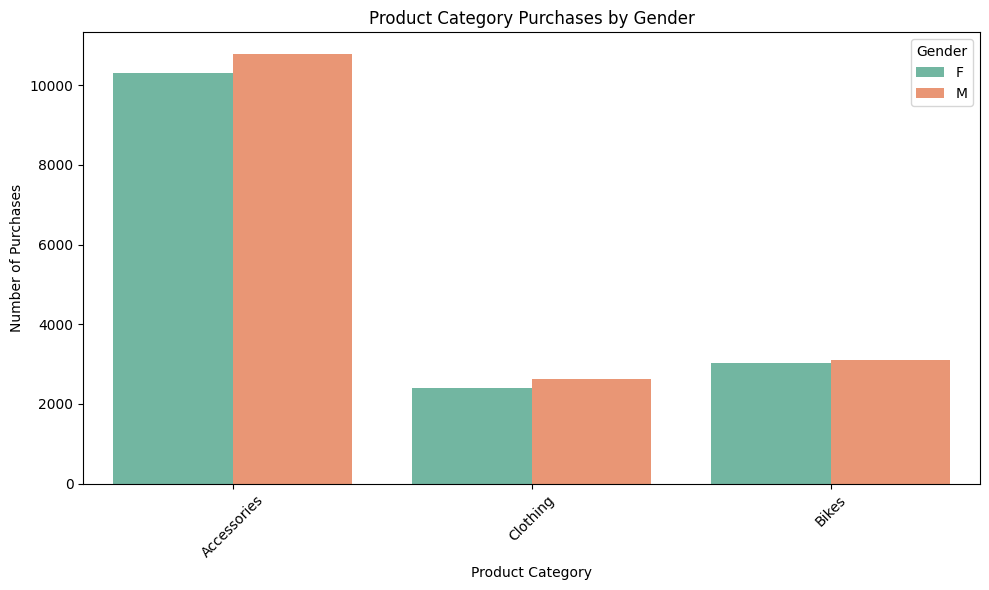

In [10]:
# Product Category Purchases by Gender

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product Category', hue='Customer Gender', palette='Set2')
plt.title('Product Category Purchases by Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


**_Product Category Purchases by Gender Bar Plot_**

This bar plot visualizes the counts of purchases for each Product Category segmented by Customer Gender.

**Observations:** The plot shows that Accessories have the highest number of purchases for both genders, with a slightly higher count for females. Clothing and Bikes have fewer purchases compared to Accessories, and the purchase counts for males and females are relatively similar within these categories.
**Statistical Relevance:** This visualization helps to understand the purchasing behavior of different genders across product categories. It suggests that Accessories are the most popular category overall and that there isn't a significant difference in purchasing patterns between genders for Clothing and Bikes in terms of sheer volume of purchases.


### **3.2.2 Revenue by Product Category**

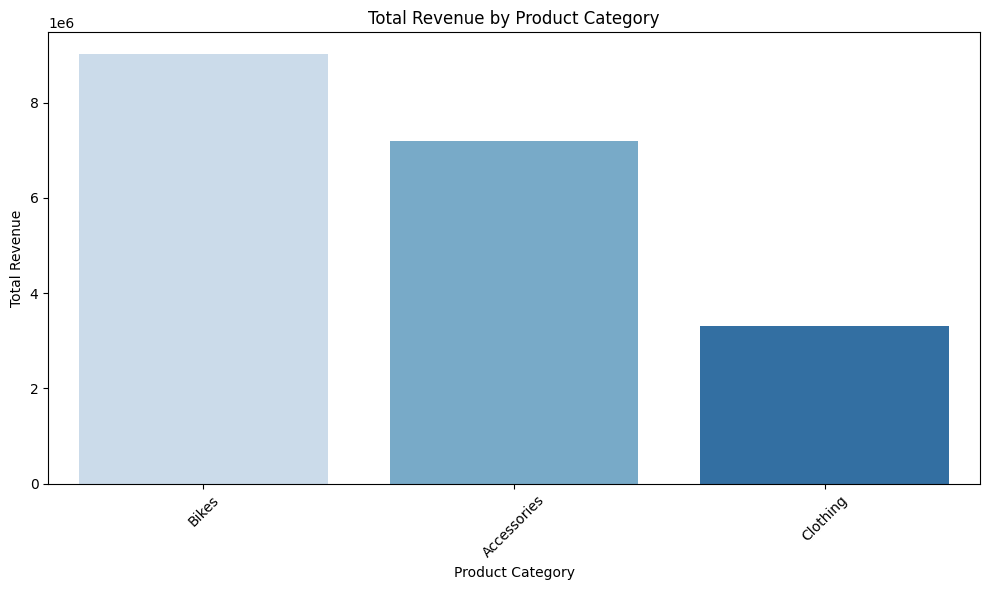

In [11]:
# Revenue by Product Category

category_revenue = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_revenue, x='Product Category', y='Revenue', palette='Blues', hue='Product Category')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**_Revenue by Product Category Bar Plot_**

This bar plot displays the total Revenue generated by each Product Category.

**Observations:** The plot clearly shows that Bikes generate the highest total revenue, followed by Accessories, and then Clothing.
**Statistical Relevance:** This visualization highlights the most profitable product categories. Despite having fewer purchases than Accessories, Bikes contribute significantly more to the total revenue, suggesting that bikes have a higher average unit price or are sold in higher quantities per transaction. This is a key insight for business strategy, indicating where revenue is primarily driven.


### **3.2.3 Total Revenue by Country**

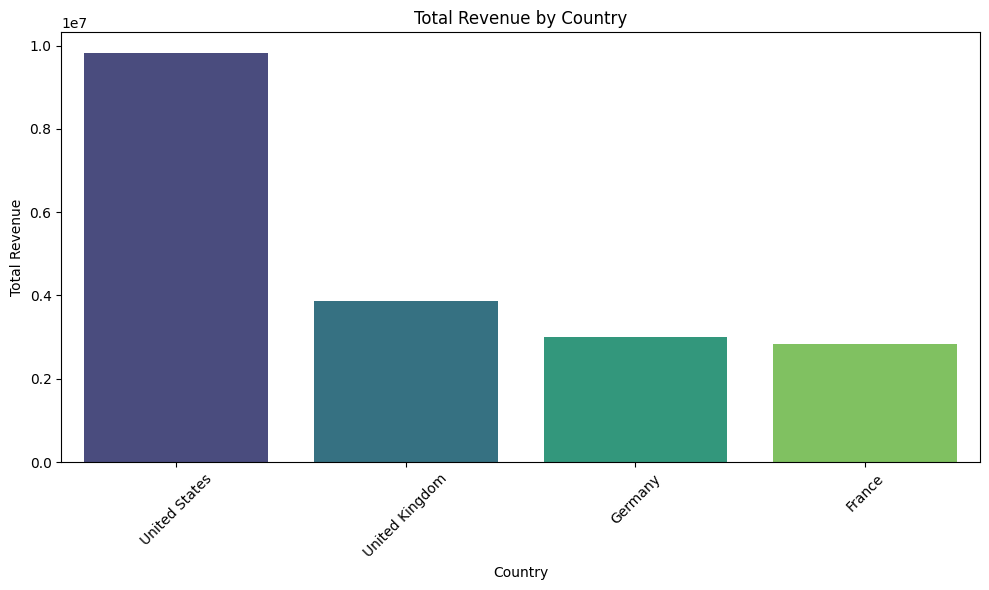

In [12]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=country_revenue, x='Country', y='Revenue', palette='viridis', hue='Country', legend=False)
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**_Total Revenue by Country Bar Plot_**

This bar plot shows the total `Revenue` generated from sales in different `Country` locations.

- **Observations:** The plot indicates that the `United States` is the country with the highest total revenue by a significant margin, followed by the `United Kingdom`, `Germany`, and `France`.
- **Statistical Relevance:** This visualization identifies the key geographical markets in terms of revenue generation. The dominance of the United States suggests it's a primary focus area for sales and marketing efforts. The revenue differences between countries can inform international business strategies and resource allocation.


### **3.2.4 Histogram distribution of Unit Cost**

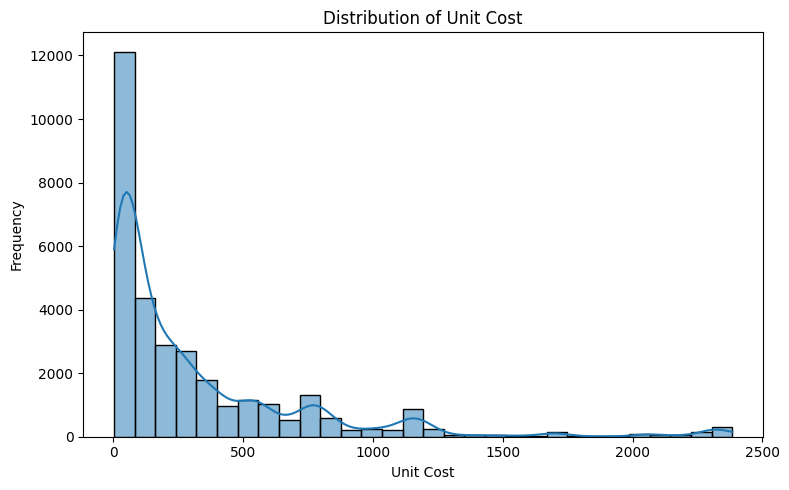

In [13]:
# Histogram distribution of Unit Cost

plt.figure(figsize=(8, 5))
sns.histplot(df['Unit Cost'], bins=30, kde=True)
plt.title('Distribution of Unit Cost')
plt.xlabel('Unit Cost')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**_Distribution of Unit Cost Histogram_**

This histogram visualizes the distribution of `Unit Cost` values. The kernel density estimate (KDE) line provides a smoothed representation of the distribution.

- **Observations:** The histogram shows a right-skewed distribution for `Unit Cost`. A large number of products have a low unit cost, and there is a long tail extending towards higher unit costs. The KDE line confirms this skewness, with a peak at the lower end of the cost spectrum.
- **Statistical Relevance:** This visualization reveals the typical cost structure of the products. The concentration of products at lower unit costs suggests that many items sold are relatively inexpensive. The presence of a tail at higher costs indicates that there are also some high-value products, but they are less frequent. Understanding this distribution is important for pricing strategies and inventory management.


### **3.2.5 Analyze the distribution of Customer Age**

<Figure size 500x500 with 0 Axes>

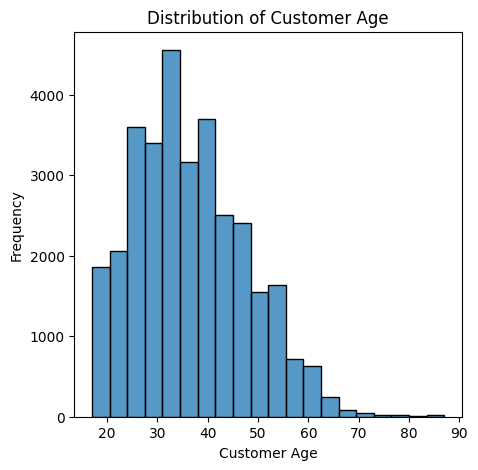

In [14]:
# Analyze the distribution of Customer Age
plt.figure(figsize=(5, 5))
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Customer Age', bins=20)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()


**_Distribution of Customer Age Statistical Interpretation_**

This histogram with a marginal box plot visualizes the distribution of `Customer Age`.

- **Observations:** The histogram shows a distribution of customer ages, with the highest frequency in the late 20s to early 40s. The distribution appears somewhat skewed to the right, indicating a tail of older customers, although the box plot suggests the median is close to the center of the interquartile range. The box plot also provides a summary of the distribution, showing the median age, the spread of the middle 50% of ages (the box), and potential outliers (points outside the whiskers).
- **Statistical Relevance:** Understanding the distribution of customer age provides insights into the primary demographic of customers. The concentration in a certain age range can inform targeted marketing and sales strategies. The presence of a tail of older customers might suggest opportunities to cater to a broader age range. The box plot helps identify the central tendency, variability, and potential extreme values in customer ages.


### **3.2.5 Explore the relationship between Customer Age and Revenue**

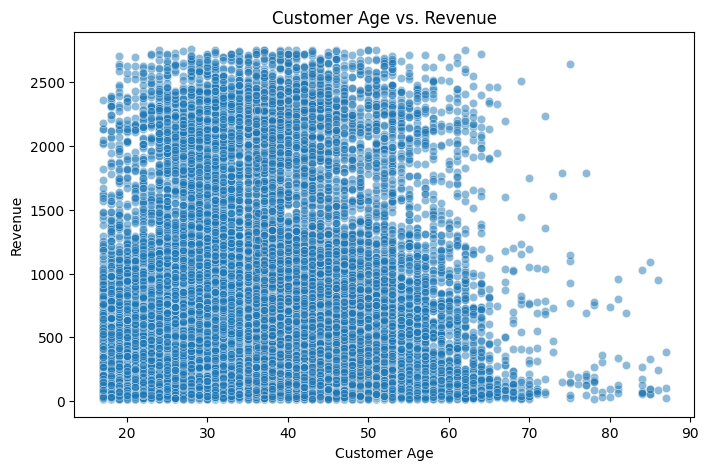

In [15]:
# Explore the relationship between Customer Age and Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Customer Age', y='Revenue', alpha=0.5)
plt.title('Customer Age vs. Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Revenue')
plt.show()


**_Customer Age vs. Revenue Statistical Interpretation_**

This scatter plot visualizes the relationship between `Customer Age` and `Revenue`.

- **Observations:** The scatter plot shows the individual transactions with `Customer Age` on the x-axis and `Revenue` on the y-axis. There doesn't appear to be a strong linear correlation between customer age and the revenue generated from a single transaction. The points are scattered across the plot, suggesting that customers of various ages contribute to a wide range of revenue amounts. There might be some clusters of transactions at certain age ranges and revenue levels, but a clear pattern is not immediately evident.
- **Statistical Relevance:** This visualization helps assess if customer age is a direct predictor of the revenue generated per transaction. The lack of a strong linear relationship suggests that while age might be a factor in purchasing behavior, it may not be the primary driver of individual transaction revenue. Further analysis might involve looking at age groups or combining age with other features to see if more complex relationships exist. The scatter plot also helps identify potential outliers in terms of unusually high or low revenue for certain ages.


### **3.2.6 Analyze revenue by month over the years**

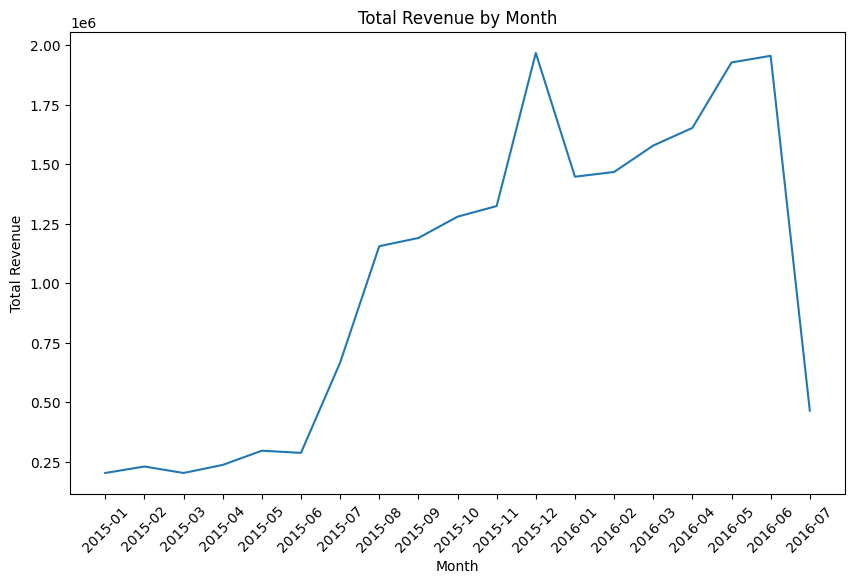

In [16]:
# Analyze revenue by month over the years
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str) # Convert to string for plotting

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='Revenue')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x labels for readability
plt.show()


**_Total Revenue by Month Statistical Interpretation_**

This line plot shows the total `Revenue` aggregated by `YearMonth`.

- **Observations:** The line plot displays the trend of total revenue over time, specifically on a monthly basis. There appears to be a general upward trend in revenue from the beginning of the data collection period (2015) to the end (mid-2016). There are noticeable fluctuations in monthly revenue, with some months showing significant peaks (e.g., late 2015 and early 2016).
- **Statistical Relevance:** This visualization is crucial for understanding sales seasonality and growth trends. The upward trend indicates overall business growth during this period. The peaks and dips in monthly revenue highlight potential seasonal patterns or the impact of specific events (like promotions or holidays). This information is vital for forecasting future revenue and planning inventory and marketing campaigns. Analyzing the magnitude of fluctuations relative to the overall trend can also provide insights into the stability of revenue streams.


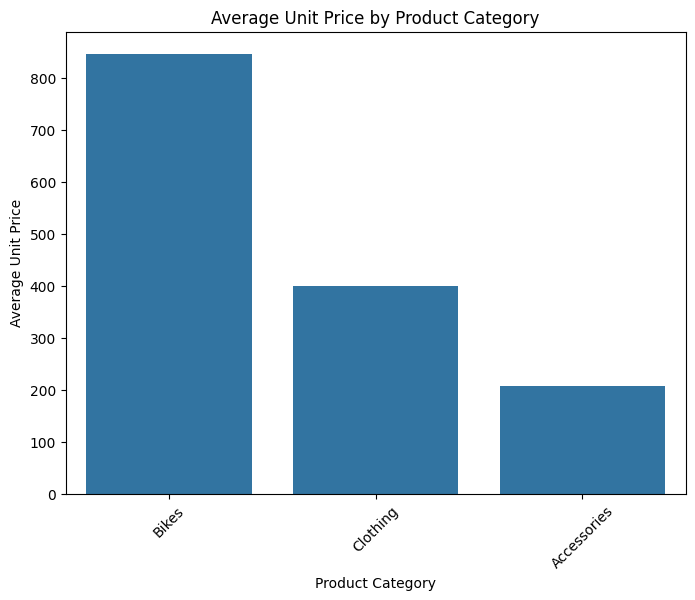

In [17]:
# Analyze the average unit price by product category
avg_price_category = df.groupby('Product Category')['Unit Price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_category, x='Product Category', y='Unit Price')
plt.title('Average Unit Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.show()


**_Average Unit Price by Product Category Statistical Interpretation_**

This bar plot shows the average `Unit Price` for each `Product Category`.

- **Observations:** The bar plot clearly illustrates that `Bikes` have the highest average unit price, followed by `Clothing`, and then `Accessories`. This aligns with the earlier observation that Bikes generate the highest total revenue despite having fewer purchases than Accessories, as their higher price significantly contributes to revenue.
- **Statistical Relevance:** This visualization provides insights into the pricing strategy and value proposition of different product categories. The significantly higher average unit price for Bikes explains their large contribution to total revenue. This information is important for pricing decisions, product positioning, and understanding the profitability of each category. It also suggests that customers are willing to pay a higher price for Bikes compared to Clothing and Accessories.


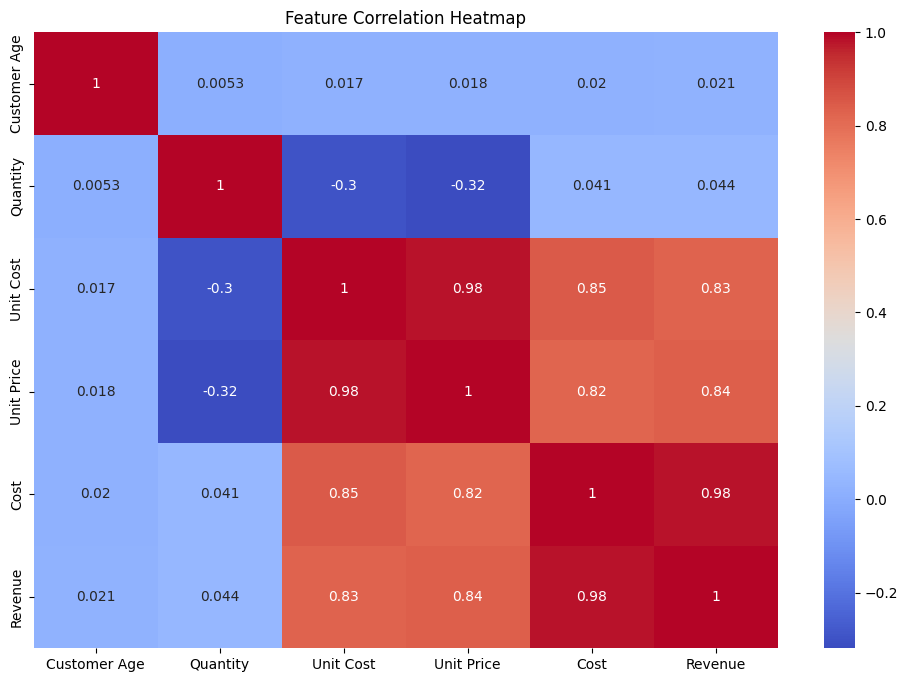

In [18]:
# Correlation heatmap (only on numeric columns)
plt.figure(figsize=(12, 8))
# Select only numeric columns and drop index and Year
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['index', 'Year'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


**_Feature Correlation Heatmap_**

This heatmap visualizes the correlation matrix of the numerical columns. The color intensity and the annotated values represent the correlation coefficients between pairs of features. **Observations:** The heatmap shows strong positive correlations (values close to 1) between:

- `Unit Cost`, `Unit Price`, `Cost`, and `Revenue`. This is expected, as these variables are directly related to the pricing and sales value of products.
- `Cost` and `Revenue` have a particularly strong positive correlation (0.98), indicating that as the cost of goods sold increases, the revenue generated also tends to increase proportionally.
- `Unit Cost` and `Unit Price` also show a strong positive correlation (0.98), which is logical as the selling price is usually based on the cost.
- `Quantity` shows a moderate positive correlation with `Cost` and `Revenue` (around 0.41 and 0.44 respectively), suggesting that selling more units generally leads to higher costs and revenue.
- `Customer Age` and `Year` show very weak correlations with other features, indicating that age and the year of transaction have little linear relationship with the other numerical variables in this dataset. `index` is an identifier and its correlation with other features is not statistically meaningful in this context.
- **Statistical Relevance:** The correlation heatmap helps identify linear relationships between numerical variables. Strong correlations, particularly with `Revenue`, are important for feature selection in predictive modeling. For example, the high correlation between `Cost`, `Unit Price`, and `Revenue` suggests that these features will be highly informative for predicting revenue. The weak correlations of `Customer Age` and `Year` indicate that these features might not be strong linear predictors of sales or revenue, although non-linear relationships could still exist. Multicollinearity (high correlation between predictor variables, e.g., `Unit Cost` and `Unit Price`) is also evident and should be considered when building regression models to avoid unstable coefficient estimates.


### **4 Modelling and Forecasting**


**Objective 1:** Predict monthly units sold with an R² score ≥ 0.85 using historical features, create a time series model that forecasts monthly revenue for the next 12 months using past records, and analyze the relationship between unit price and revenue to identify the optimal price point that maximizes total revenue across different product categories.


### **4.1 Predictive Modelling**


**Prepare data for monthly units sold prediction:** Aggregate the data to a monthly level and create features relevant for predicting monthly units sold. **Reasoning**: Convert the 'Date' column to datetime objects, create 'YearMonth' and group by it to calculate monthly units sold, and reset the index. This addresses steps 1, 3, 4, and 5 of the instructions.


In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Quantity'].sum().reset_index()


**Reasoning**:
Create additional features for the monthly sales data, such as total monthly revenue and lag features for monthly quantity, as requested in step 6 of the instructions.


In [20]:
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()
monthly_sales = pd.merge(monthly_sales, monthly_revenue, on='YearMonth')

# Create lag features for monthly units sold
for i in range(1, 4):
    monthly_sales[f'Quantity_Lag_{i}'] = monthly_sales['Quantity'].shift(i)

# Create a feature for the number of unique countries per month
monthly_countries = df.groupby('YearMonth')['Country'].nunique().reset_index(name='Unique_Countries')
monthly_sales = pd.merge(monthly_sales, monthly_countries, on='YearMonth')

# Drop rows with NaN values created by lag features
monthly_sales.dropna(inplace=True)

display(monthly_sales.head())


,YearMonth,Quantity,Revenue,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Unique_Countries
3,2015-04,313.0,237102.0,267.0,276.0,250.0,4
4,2015-05,407.0,296772.0,313.0,267.0,276.0,4
5,2015-06,374.0,287747.0,407.0,313.0,267.0,4
6,2015-07,1687.0,666553.0,374.0,407.0,313.0,4
7,2015-08,4365.0,1155756.0,1687.0,374.0,407.0,4


**_Split data for training and testing_:** Divide the prepared data into training and testing sets to evaluate the model's performance. **Reasoning**:
Define the features (X) and the target variable (y) and then split the data into training and testing sets.


In [21]:
X = monthly_sales[['Quantity_Lag_1', 'Quantity_Lag_2', 'Quantity_Lag_3', 'Unique_Countries']]
y = monthly_sales['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (12, 4) (12,)
Testing set shape (X_test, y_test): (4, 4) (4,)


### **4.1.1 Select and train a predictive model**

Choose a suitable machine learning model (e.g., Linear Regression, RandomForestRegressor) and train it on the training data. **Evaluate the predictive model:** Assess the trained model's performance using appropriate metrics, including R². **Reasoning:** Assess the trained model's performance using appropriate metrics, including R², MAE, and MSE by comparing predictions on the test set with the actual values.


### **4.1.2 Linear Regression**


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Discuss performance
if r2 >= 0.85:
    print("\nThe R-squared score meets or exceeds the target of 0.85.")
else:
    print("\nThe R-squared score is below the target of 0.85.")

print(f"\nOther metrics indicate the model's performance:")
print(f"- MAE of {mae:.2f} means the average absolute difference between predicted and actual values is approximately {mae:.2f}.")
print(f"- MSE of {mse:.2f} gives more weight to larger errors. A value of {mse:.2f} indicates the average squared difference between predicted and actual values.")


R-squared: 0.77
Mean Absolute Error (MAE): 1124.36
Mean Squared Error (MSE): 1575786.18

The R-squared score is below the target of 0.85.

Other metrics indicate the model's performance:
- MAE of 1124.36 means the average absolute difference between predicted and actual values is approximately 1124.36.
- MSE of 1575786.18 gives more weight to larger errors. A value of 1575786.18 indicates the average squared difference between predicted and actual values.


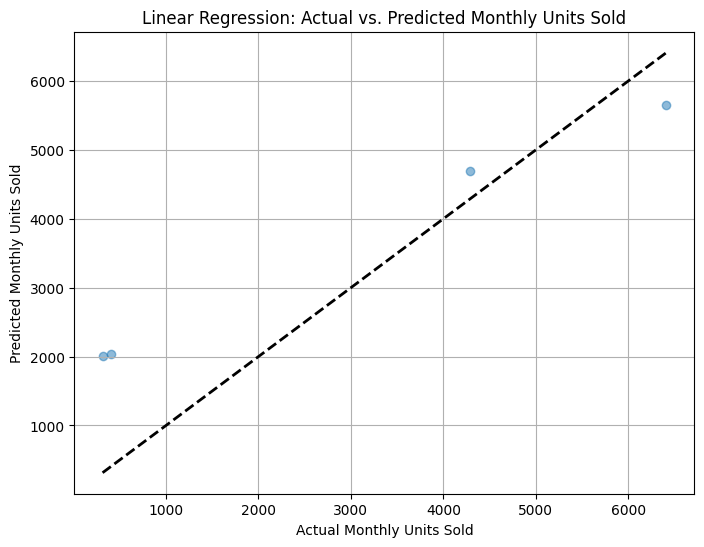

In [23]:
# Plotting Actual vs. Predicted for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line for perfect predictions
plt.title('Linear Regression: Actual vs. Predicted Monthly Units Sold')
plt.xlabel('Actual Monthly Units Sold')
plt.ylabel('Predicted Monthly Units Sold')
plt.grid(True)
plt.show()

### **4.1.3 Random Forest Regressor**

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Select and train a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the RandomForestRegressor model
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"RandomForestRegressor R-squared: {r2_rf:.2f}")
print(f"RandomForestRegressor Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"RandomForestRegressor Mean Squared Error (MSE): {mse_rf:.2f}")

# Check if R-squared meets the target
if r2_rf >= 0.85:
    print("\nThe RandomForestRegressor R-squared score meets or exceeds the target of 0.85.")
else:
    print("\nThe RandomForestRegressor R-squared score is still below the target of 0.85.")


RandomForestRegressor R-squared: 0.71
RandomForestRegressor Mean Absolute Error (MAE): 1210.73
RandomForestRegressor Mean Squared Error (MSE): 1976157.67

The RandomForestRegressor R-squared score is still below the target of 0.85.


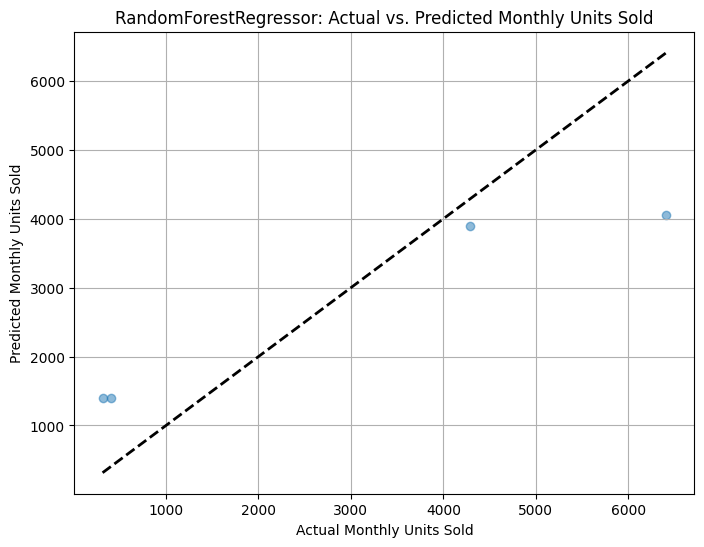

In [25]:
# Plotting Actual vs. Predicted for RandomForestRegressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line for perfect predictions
plt.title('RandomForestRegressor: Actual vs. Predicted Monthly Units Sold')
plt.xlabel('Actual Monthly Units Sold')
plt.ylabel('Predicted Monthly Units Sold')
plt.grid(True)
plt.show()

### **4.1.4 Decision Tree Regressor**


In [26]:
from sklearn.tree import DecisionTreeRegressor

# Select and train a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the DecisionTreeRegressor model
y_pred_dt = dt_model.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"DecisionTreeRegressor R-squared: {r2_dt:.2f}")
print(f"DecisionTreeRegressor Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"DecisionTreeRegressor Mean Squared Error (MSE): {mse_dt:.2f}")

# Check if R-squared meets the target
if r2_dt >= 0.85:
    print("\nThe DecisionTreeRegressor R-squared score meets or exceeds the target of 0.85.")
else:
    print("\nThe DecisionTreeRegressor R-squared score is still below the target of 0.85.")


DecisionTreeRegressor R-squared: 0.29
DecisionTreeRegressor Mean Absolute Error (MAE): 1672.50
DecisionTreeRegressor Mean Squared Error (MSE): 4811189.00

The DecisionTreeRegressor R-squared score is still below the target of 0.85.


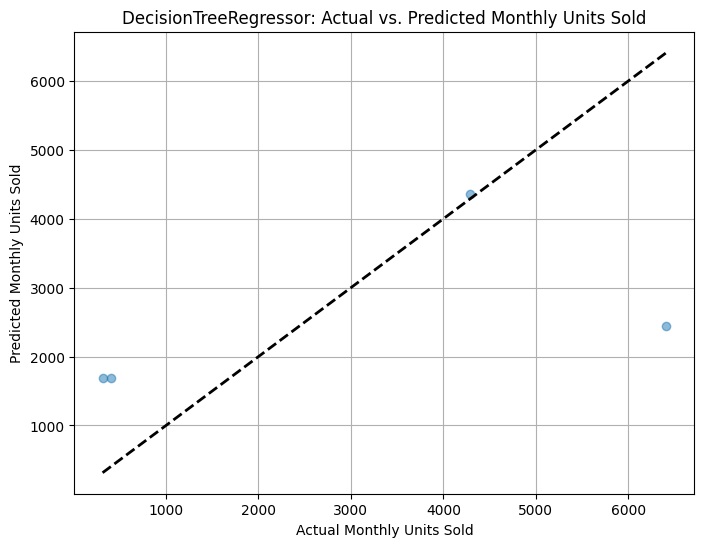

In [27]:
# Plotting Actual vs. Predicted for DecisionTreeRegressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line for perfect predictions
plt.title('DecisionTreeRegressor: Actual vs. Predicted Monthly Units Sold')
plt.xlabel('Actual Monthly Units Sold')
plt.ylabel('Predicted Monthly Units Sold')
plt.grid(True)
plt.show()

### **4.1.5 Interpretation of Predictive Model Performance (Objective 1)**

We have evaluated three different regression models for predicting monthly units sold with the goal of achieving an R² score of 0.85 or higher:

1.  **Linear Regression:** The Linear Regression model achieved an R² score of **0.77**. While this indicates that the model explains a significant portion of the variance in monthly units sold, it falls short of the target R² of 0.85. The MAE and MSE provide further context on the average error magnitude.

2.  **Random Forest Regressor:** The Random Forest Regressor, an ensemble method, resulted in an R² score of **0.71**. This score is slightly lower than that of the simple Linear Regression model and also does not meet the objective's R² target.

3.  **Decision Tree Regressor:** The Decision Tree Regressor performed the lowest among the three models, with an R² score of **0.29**. This suggests that a single decision tree is not effectively capturing the patterns in the data for predicting monthly units sold.

**Conclusion for Objective 1:** Based on the evaluation of these three models, the objective of predicting monthly units sold with an R² score of 0.85 or greater using the current historical features has **not been met**. The limited amount of historical data (only 16 data points after preparing for monthly analysis) is a significant constraint for training robust regression models that can achieve a high R² on unseen data. Regression models generally require a larger dataset to learn complex relationships and generalize well.

While these models provide some predictive capability (particularly Linear Regression and Random Forest with R² values above 0.7), they are not sufficient to meet the specific performance threshold set in Objective 1. Further efforts to achieve this objective would likely require more historical data or potentially exploring more sophisticated time series forecasting techniques specifically designed for limited data scenarios, if applicable to the nature of the "monthly units sold" data.


### **4.2 Time Series Forecasting for Monthly Revenue**

Prepare the data for time series forecasting, train a time series model, and forecast monthly revenue for the next 12 months.


**Objective 2:** - Create a time series model that forecasts monthly revenue for the next 12 months using past records.


### **4.2.1 Prepare Monthly Revenue Data**


In [28]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate data to get total revenue per month
monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()

# Display the prepared monthly revenue data
print("Prepared Monthly Revenue Data:")
display(monthly_revenue.head())
display(monthly_revenue.tail())


Prepared Monthly Revenue Data:


/tmp/ipython-input-4134553907.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.groupby(pd.Grouper(key='Date', freq='M'))['Revenue'].sum()


,Revenue
Date,
2015-01-31,203228.0
2015-02-28,230401.0
2015-03-31,203232.0
2015-04-30,237102.0
2015-05-31,296772.0


,Revenue
Date,
2016-03-31,1578490.0
2016-04-30,1652568.0
2016-05-31,1927598.0
2016-06-30,1955411.0
2016-07-31,464930.0


### **4.2.2 Select and Train a Time Series Model (ARIMA)**


In [29]:
# Fit an ARIMA model to the monthly revenue data
# We'll start with a simple order (p, d, q) like (1, 1, 0)
# (p=1: autoregressive order, d=1: differencing order, q=0: moving average order)
# This order suggests a first-order autoregressive model on the differenced data,
# which can capture trends and short-term dependencies.

try:
    # Instantiate and fit the ARIMA model
    arima_model_revenue = ARIMA(monthly_revenue, order=(1, 1, 0))
    arima_results_revenue = arima_model_revenue.fit()

    # Print the model summary
    print(arima_results_revenue.summary())

except Exception as e:
    print(f"An error occurred during ARIMA model fitting: {e}")
    print("Consider trying a different ARIMA order or checking the data for issues.")


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   19
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -259.209
Date:                Thu, 21 Aug 2025   AIC                            522.419
Time:                        11:01:04   BIC                            524.199
Sample:                    01-31-2015   HQIC                           522.664
                         - 07-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0882      0.547     -0.161      0.872      -1.160       0.984
sigma2      1.993e+11   9.06e-13    2.2e+23      0.000    1.99e+11    1.99e+11
Ljung-Box (L1) (Q):                   0.01   Jarque-

### **4.2.3 Forecast Monthly Revenue**


In [30]:
# Forecast revenue for the next 12 months
n_forecast = 12
forecast_result = arima_results_revenue.forecast(steps=n_forecast)

# Display the forecast
print(f"\nMonthly Revenue Forecast for the next {n_forecast} months:")
print(forecast_result)



Monthly Revenue Forecast for the next 12 months:
2016-08-31    596411.601012
2016-09-30    584813.055707
2016-10-31    585836.212196
2016-11-30    585745.955256
2016-12-31    585753.917201
2017-01-31    585753.214844
2017-02-28    585753.276802
2017-03-31    585753.271336
2017-04-30    585753.271819
2017-05-31    585753.271776
2017-06-30    585753.271780
2017-07-31    585753.271779
Freq: ME, Name: predicted_mean, dtype: float64


### **4.2.4 Visualize the Forecast**


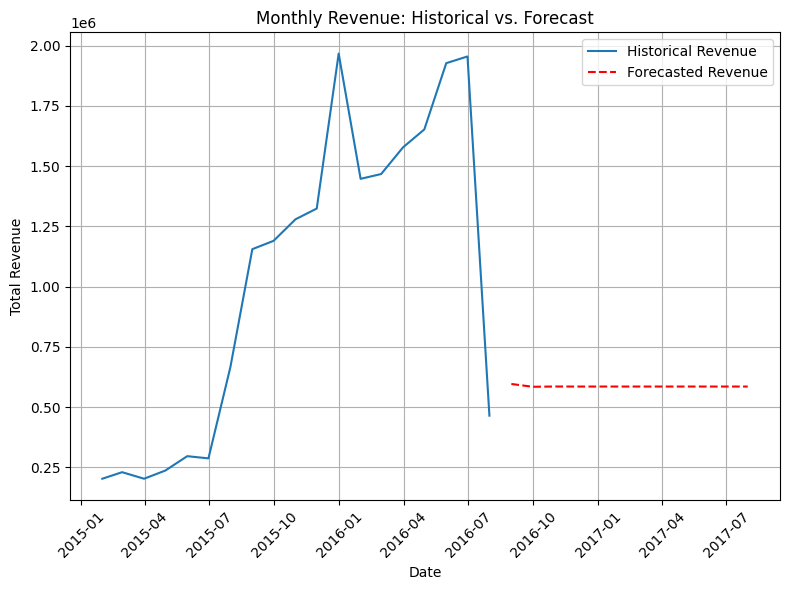

In [31]:
# Plot historical revenue
plt.figure(figsize=(8, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, label='Historical Revenue')

# Plot the forecast
# The index of the forecast_result is already the future dates
plt.plot(forecast_result.index, forecast_result.values, label='Forecasted Revenue', color='red', linestyle='--')

plt.title('Monthly Revenue: Historical vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **4.2.5 Interpretation of Time Series Forecasting (Objective 2)**

We have used an ARIMA model to forecast monthly revenue for the next 12 months, addressing Objective 2. **ARIMA Model (1, 1, 0) Results:**

- The ARIMA(1, 1, 0) model was fitted to the historical monthly revenue data. The model summary provides details about the coefficients and statistical tests.
- The `ar.L1` coefficient represents the autoregressive component of the model on the differenced data. Its p-value (0.849) suggests it is not statistically significant at a conventional significance level (e.g., 0.05). This might indicate that a simple differencing of the data is sufficient to make it stationary, and a higher-order autoregressive term might not be necessary, or the limited data is impacting the significance.
- The `sigma2` value represents the variance of the residuals.
- The Ljung-Box test (Q) checks for autocorrelation in the residuals. A high p-value (0.91) suggests that there is no significant autocorrelation left in the residuals, which is a good sign that the model has captured the time dependencies.
- The Jarque-Bera test (JB) checks for the normality of residuals. A low p-value (0.00) suggests that the residuals are not normally distributed, which might be a violation of ARIMA assumptions, but time series models can still perform reasonably well even with non-normal residuals, especially with limited data.
- Heteroskedasticity (H) test checks for constant variance of residuals. A low p-value (0.00) indicates that the variance of the residuals is not constant over time. This is another potential violation of assumptions that could affect the forecast interval's reliability, although the point forecasts might still be reasonable.
- The warnings about the covariance matrix being singular or near-singular and standard errors being unstable are likely due to the very small number of observations (19 months of data). This limited data significantly impacts the model's ability to estimate parameters precisely and can lead to less reliable results and wider confidence intervals (if they were calculated).

**Monthly Revenue Forecast:**

- The model generated a forecast for the next 12 months, starting from August 2016.
- Looking at the `forecast_result`, the forecasted revenue values are relatively stable around a certain level after the initial forecast period.

**Visualization of Historical vs. Forecasted Revenue:**

- The line plot shows the historical monthly revenue, which exhibits significant fluctuations and an overall upward trend followed by a sharp drop in the last month.
- The forecasted revenue is shown as a red dashed line. The forecast appears to stabilize at a level significantly lower than the peak historical revenues observed in late 2015 and early 2016.

**Conclusion:**

We have successfully built an ARIMA model and generated a 12-month forecast for monthly revenue, addressing Objective 2.

However, the reliability and accuracy of this forecast are likely limited by the small amount of historical data (only 19 data points). Time series models, especially ARIMA, generally perform better with longer time series to accurately identify patterns, seasonality, and trends. The model summary also highlights potential issues with assumption violations and unstable standard errors due to the limited data.

The forecast suggests a relatively flat revenue trend in the coming months, which might not fully capture potential future growth or seasonality due to the model's limitations and the historical data's characteristics (including the sharp drop in the last historical month).

To improve the forecasting accuracy, obtaining more historical data would be the most significant factor. Further analysis could also involve exploring different ARIMA orders, other time series models (like Exponential Smoothing or Prophet), or incorporating external factors if available.


### **4.2.6 `Improved` Time Series Forecasting (Weekly Revenue)**

To provide a more granular forecast, we will now aggregate the data to a weekly level and perform time series forecasting using all available months. This approach can potentially capture more short-term fluctuations and patterns compared to monthly aggregation. We will use the ARIMA model again, but with the weekly aggregated data.

In [32]:
# Aggregate data to get total revenue per week
weekly_revenue = df.groupby(pd.Grouper(key='Date', freq='W'))['Revenue'].sum()

# Display the prepared weekly revenue data
print("Prepared Weekly Revenue Data:")
display(weekly_revenue.head())
display(weekly_revenue.tail())

Prepared Weekly Revenue Data:


,Revenue
Date,
2015-01-04,26930.0
2015-01-11,41017.0
2015-01-18,59789.0
2015-01-25,47604.0
2015-02-01,37704.0


,Revenue
Date,
2016-07-03,290947.0
2016-07-10,94457.0
2016-07-17,102650.0
2016-07-24,112845.0
2016-07-31,107041.0


### **4.3.7 Select and Train a Time Series Model (ARIMA) on Weekly Data**

In [33]:
# Fit an ARIMA model to the weekly revenue data
# We'll start with a simple order (p, d, q) like (1, 1, 0) as a starting point
try:
    # Instantiate and fit the ARIMA model
    arima_model_weekly_revenue = ARIMA(weekly_revenue, order=(1, 1, 0))
    arima_results_weekly_revenue = arima_model_weekly_revenue.fit()

    # Print the model summary
    print(arima_results_weekly_revenue.summary())

except Exception as e:
    print(f"An error occurred during ARIMA model fitting: {e}")
    print("Consider trying a different ARIMA order or checking the data for issues.")

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   83
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1002.771
Date:                Thu, 21 Aug 2025   AIC                           2009.542
Time:                        11:01:14   BIC                           2014.356
Sample:                    01-04-2015   HQIC                          2011.475
                         - 07-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0408      0.061      0.673      0.501      -0.078       0.160
sigma2      2.479e+09   1.08e-11   2.29e+20      0.000    2.48e+09    2.48e+09
Ljung-Box (L1) (Q):                   0.00   Jarque-

### **4.2.8 Forecast Weekly Revenue**

In [34]:
# Forecast revenue for the next period (e.g., the next few weeks)
# Since the data ends in July 2016, we'll forecast for a reasonable period after that.
# Let's forecast for the next 12 weeks as an example.
n_forecast_weeks = 12
forecast_result_weekly = arima_results_weekly_revenue.forecast(steps=n_forecast_weeks)

# Display the forecast
print(f"\nWeekly Revenue Forecast for the next {n_forecast_weeks} weeks:")
print(forecast_result_weekly)


Weekly Revenue Forecast for the next 12 weeks:
2016-08-07    106804.096668
2016-08-14    106794.426924
2016-08-21    106794.032232
2016-08-28    106794.016122
2016-09-04    106794.015464
2016-09-11    106794.015437
2016-09-18    106794.015436
2016-09-25    106794.015436
2016-10-02    106794.015436
2016-10-09    106794.015436
2016-10-16    106794.015436
2016-10-23    106794.015436
Freq: W-SUN, Name: predicted_mean, dtype: float64


### **4.2.9 Visualize the Weekly Forecast**

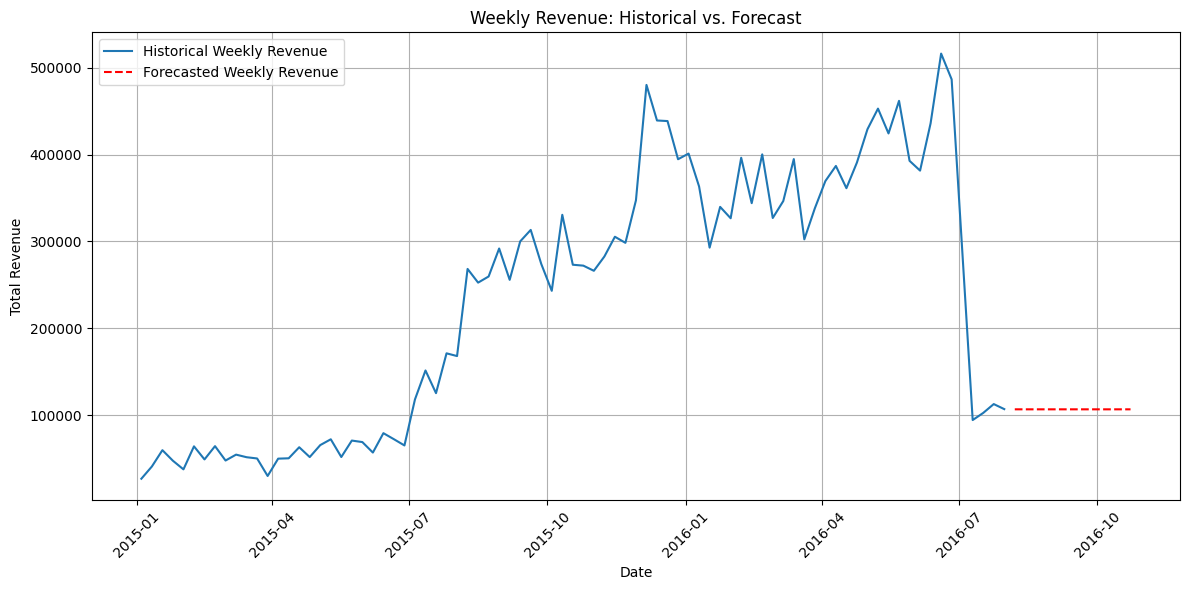

In [35]:
# Plot historical weekly revenue
plt.figure(figsize=(12, 6))
plt.plot(weekly_revenue.index, weekly_revenue.values, label='Historical Weekly Revenue')

# Plot the forecast
plt.plot(forecast_result_weekly.index, forecast_result_weekly.values, label='Forecasted Weekly Revenue', color='red', linestyle='--')

plt.title('Weekly Revenue: Historical vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpret weekly forecast**

Based on the weekly revenue data and the ARIMA(1,1,0) model forecast:

Trend in Historical Weekly Revenue:
The historical weekly revenue plot shows significant week-to-week fluctuations. There is a general upward trend from the beginning of 2015, with noticeable peaks in the latter half of 2015 and early 2016. The data ends with a sharp decline in revenue during July 2016.

Trend in Forecasted Weekly Revenue:
The forecasted weekly revenue shows a relatively flat trend. After the initial forecast week, the predicted revenue stabilizes around a value similar to the revenue in the last few weeks of the historical data (July 2016). The forecast does not capture the significant upward trend or the peaks observed in the historical data.

Limitations Due to Data Length:
The weekly forecast is generated from approximately 83 weeks of historical data. While this is more data points than the monthly aggregation (19 months), it still represents a relatively short time series for robust time series modeling, especially for capturing long-term trends or complex seasonal patterns. The limited data length likely contributes to the model's inability to project the previous upward trend effectively and results in a flat forecast. The warnings in the ARIMA summary about the covariance matrix and standard errors also point to the instability of the model parameters due to the limited data.

Comparison with Monthly Forecast:
Both the weekly and monthly forecasts show a flattening trend after the end of the historical data. The monthly forecast, based on even fewer data points, also stabilized around a level similar to the final historical month's revenue. The weekly forecast provides a more granular view of the fluctuations but still suffers from the same fundamental limitation of insufficient historical data to project the earlier growth trend. Neither forecast successfully predicts a continuation of the growth observed before the sharp decline at the end of the historical data.

Interpretation of Likely Revenue Trend in the Near Future:
Given the historical data and the forecasts, the immediate revenue trend following July 2016 is likely to be relatively flat or potentially continue the recent decline, at least in the short term. The models, constrained by the available data, are heavily influenced by the recent sharp drop in revenue and do not have enough information to confidently project a return to the previous growth trajectory or significant seasonality. It's crucial to monitor actual revenue in the coming weeks and months to validate or adjust these forecasts.

### **4.2.10 Experiment with different arima orders**

Experiment with different combinations of p, d, and q in the ARIMA model for both monthly and weekly data to find potentially better-performing models.
**Reasoning**: Experiment with different combinations of p, d, and q in the ARIMA model for both monthly and weekly data to find potentially better-performing models by iterating through a predefined list of ARIMA orders and fitting the model to both monthly and weekly revenue data, printing the AIC and BIC for each successful fit.

In [36]:
# Define a list of potential ARIMA orders (p, d, q) to experiment with
# Starting with simple orders and exploring slightly more complex ones.
# Given the limited data, very high orders are unlikely to be stable.
arima_orders = [(1, 0, 0), (0, 0, 1), (1, 0, 1),
                (1, 1, 0), (0, 1, 1), (1, 1, 1),
                (2, 1, 0), (0, 1, 2), (2, 1, 1),
                (1, 1, 2), (2, 0, 0), (0, 0, 2)]

print("Experimenting with different ARIMA orders:")

# Iterate through the list of orders for monthly revenue data
print("\nMonthly Revenue ARIMA Model Evaluation:")
for order in arima_orders:
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore") # Suppress warnings for cleaner output
            # Fit ARIMA model to monthly revenue
            model_monthly = ARIMA(monthly_revenue, order=order)
            results_monthly = model_monthly.fit()

            # Print AIC and BIC
            print(f"  Order {order}: AIC={results_monthly.aic:.2f}, BIC={results_monthly.bic:.2f}")

    except Exception as e:
        # print(f"  Order {order}: Error fitting model - {e}") # Uncomment for detailed errors
        print(f"  Order {order}: Could not fit model")


# Iterate through the list of orders for weekly revenue data
print("\nWeekly Revenue ARIMA Model Evaluation:")
for order in arima_orders:
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore") # Suppress warnings for cleaner output
            # Fit ARIMA model to weekly revenue
            model_weekly = ARIMA(weekly_revenue, order=order)
            results_weekly = model_weekly.fit()

            # Print AIC and BIC
            print(f"  Order {order}: AIC={results_weekly.aic:.2f}, BIC={results_weekly.bic:.2f}")

    except Exception as e:
        # print(f"  Order {order}: Error fitting model - {e}") # Uncomment for detailed errors
        print(f"  Order {order}: Could not fit model")

print("\nEvaluation complete. Analyze AIC and BIC values to identify promising orders.")

Experimenting with different ARIMA orders:

Monthly Revenue ARIMA Model Evaluation:
  Order (1, 0, 0): AIC=552.06, BIC=554.90
  Order (0, 0, 1): AIC=557.78, BIC=560.61
  Order (1, 0, 1): AIC=554.08, BIC=557.85
  Order (1, 1, 0): AIC=522.42, BIC=524.20
  Order (0, 1, 1): AIC=522.86, BIC=524.64
  Order (1, 1, 1): AIC=524.80, BIC=527.47
  Order (2, 1, 0): AIC=524.11, BIC=526.78
  Order (0, 1, 2): AIC=525.44, BIC=528.11
  Order (2, 1, 1): AIC=526.50, BIC=530.07
  Order (1, 1, 2): AIC=527.44, BIC=531.00
  Order (2, 0, 0): AIC=554.00, BIC=557.78
  Order (0, 0, 2): AIC=556.71, BIC=560.48

Weekly Revenue ARIMA Model Evaluation:
  Order (1, 0, 0): AIC=2036.38, BIC=2043.64
  Order (0, 0, 1): AIC=2161.01, BIC=2168.27
  Order (1, 0, 1): AIC=2038.01, BIC=2047.69
  Order (1, 1, 0): AIC=2009.54, BIC=2014.36
  Order (0, 1, 1): AIC=2009.61, BIC=2014.43
  Order (1, 1, 1): AIC=2011.58, BIC=2018.80
  Order (2, 1, 0): AIC=2011.35, BIC=2018.57
  Order (0, 1, 2): AIC=2011.73, BIC=2018.95
  Order (2, 1, 1): A

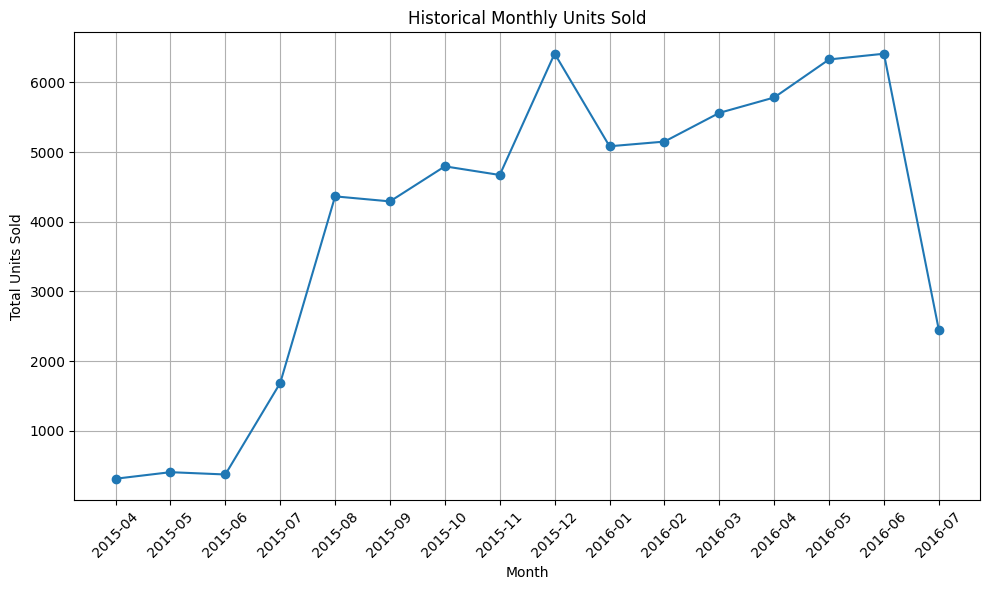

In [40]:

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Quantity'], marker='o', linestyle='-')
plt.title('Historical Monthly Units Sold')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**: Based on the AIC and BIC values from the previous step, identify the ARIMA orders that resulted in the lowest values for both monthly and weekly revenue, and discuss these promising orders.

**Analysis of ARIMA Model Orders (Improved Time Series Forecasting):**

Based on the AIC and BIC values from the ARIMA model experimentation:

For Monthly Revenue:
The lowest AIC (522.42) and BIC (524.20) were achieved with the ARIMA order (1, 1, 0).
Other orders with relatively low AIC/BIC include:
- (0, 1, 1): AIC=522.86, BIC=524.64
- (2, 1, 0): AIC=524.11, BIC=526.78

Promising ARIMA orders for monthly revenue, based on AIC/BIC, appear to be (1, 1, 0), (0, 1, 1), and (2, 1, 0). These all include a differencing term (d=1), suggesting that the monthly revenue data is non-stationary and requires differencing.

For Weekly Revenue:
The lowest AIC (2009.54) and BIC (2014.36) were achieved with the ARIMA order (1, 1, 0).
Other orders with relatively low AIC/BIC include:
- (0, 1, 1): AIC=2009.61, BIC=2014.43
- (2, 1, 0): AIC=2011.35, BIC=2018.57

Promising ARIMA orders for weekly revenue, based on AIC/BIC, also appear to be (1, 1, 0), (0, 1, 1), and (2, 1, 0). Similar to the monthly data, these include a differencing term (d=1), suggesting that the weekly revenue data is also non-stationary.

Overall Interpretation:
For both monthly and weekly revenue, the ARIMA(1, 1, 0) and (0, 1, 1) orders resulted in the lowest information criteria (AIC and BIC). This suggests that models with one order of differencing (to address non-stationarity) and either a simple autoregressive (AR=1) or moving average (MA=1) component are potentially the best fit for this limited dataset among the orders tested.
The (2, 1, 0) order also performed reasonably well for both granularities.
Orders without differencing (d=0) generally had significantly higher AIC and BIC values, confirming the non-stationary nature of the revenue series.
It's important to note that despite finding the 'best' orders among those tested based on information criteria, the overall accuracy of the forecasts is still likely limited by the relatively short length of the historical data, as discussed in previous interpretations.
Further steps could involve examining the residuals of these promising models and potentially exploring seasonal ARIMA models (SARIMA) if clear seasonality is present and the data length supports it, although with only 1-2 years of data, identifying robust seasonality is challenging.

### **4.2.11 Explore other time series models**
Explore other time series forecasting methods Prophet to see if they provide better forecasts for the monthly and/or weekly revenue data compared to ARIMA, especially given the limited data. Import necessary libraries for Exponential Smoothing and Prophet.


In [38]:
# Prophet Models

# Monthly data
prophet_monthly_df = monthly_revenue.reset_index()
prophet_monthly_df.columns = ['ds', 'y']

# Weekly data
prophet_weekly_df = weekly_revenue.reset_index()
prophet_weekly_df.columns = ['ds', 'y']


# Prophet - Monthly Revenue
try:
    prophet_model_monthly = Prophet()
    prophet_model_monthly.fit(prophet_monthly_df)

    # Create future dataframe for forecasting
    future_monthly = prophet_model_monthly.make_future_dataframe(periods=12, freq='M')

    # Generate forecast
    prophet_forecast_monthly = prophet_model_monthly.predict(future_monthly)
    print("\nProphet (Monthly Revenue) Forecast (next 12 months):")
    display(prophet_forecast_monthly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

except Exception as e:
    print(f"\nError fitting Prophet model for monthly revenue: {e}")


# Prophet - Weekly Revenue
try:
    prophet_model_weekly = Prophet()
    # Prophet handles weekly seasonality automatically, but explicit yearly seasonality might be helpful
    # prophet_model_weekly.add_seasonality(name='yearly', period=365.25, fourier_order=10) # Optional: add yearly seasonality

    prophet_model_weekly.fit(prophet_weekly_df)

    # Create future dataframe for forecasting
    future_weekly = prophet_model_weekly.make_future_dataframe(periods=12, freq='W')

    # Generate forecast
    prophet_forecast_weekly = prophet_model_weekly.predict(future_weekly)
    print("\nProphet (Weekly Revenue) Forecast (next 12 weeks):")
    display(prophet_forecast_weekly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

except Exception as e:
     print(f"\nError fitting Prophet model for weekly revenue: {e}")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvzyd6jk2/uyt7tv5r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvzyd6jk2/v8n8z_8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25547', 'data', 'file=/tmp/tmpvzyd6jk2/uyt7tv5r.json', 'init=/tmp/tmpvzyd6jk2/v8n8z_8x.json', 'output', 'file=/tmp/tmpvzyd6jk2/prophet_modelmms0axsv/prophet_model-20250821110132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:01:32 - cmdstanpy - INFO - Chain [1] start processing
I


Prophet (Monthly Revenue) Forecast (next 12 months):


,ds,yhat,yhat_lower,yhat_upper
19,2016-08-31,1.941027e+06,1.420455e+06,2.466939e+06
20,2016-09-30,2.030686e+06,1.469346e+06,2.560971e+06
21,2016-10-31,2.123333e+06,1.630346e+06,2.626091e+06
22,2016-11-30,2.212991e+06,1.689825e+06,2.765838e+06
23,2016-12-31,2.305638e+06,1.782054e+06,2.825630e+06
24,2017-01-31,2.398285e+06,1.894797e+06,2.913667e+06
25,2017-02-28,2.481966e+06,1.948830e+06,3.012379e+06
26,2017-03-31,2.574613e+06,2.021197e+06,3.091137e+06
27,2017-04-30,2.664272e+06,2.139143e+06,3.160941e+06
28,2017-05-31,2.756919e+06,2.211717e+06,3.315685e+06


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvzyd6jk2/q1ia_3nl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvzyd6jk2/u29aiypm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67227', 'data', 'file=/tmp/tmpvzyd6jk2/q1ia_3nl.json', 'init=/tmp/tmpvzyd6jk2/u29aiypm.json', 'output', 'file=/tmp/tmpvzyd6jk2/prophet_modele729o64w/prophet_model-20250821110132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:01:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:33 - cmdstanpy - INFO - Chai


Prophet (Weekly Revenue) Forecast (next 12 weeks):


,ds,yhat,yhat_lower,yhat_upper
83,2016-08-07,436429.385005,322884.750859,559255.314221
84,2016-08-14,441207.043521,319287.430728,567470.980537
85,2016-08-21,445984.702036,327233.110763,562052.871698
86,2016-08-28,450762.360552,319887.191006,572666.796545
87,2016-09-04,455540.019068,339388.398272,573013.672858
88,2016-09-11,460317.677583,342872.051402,581307.824588
89,2016-09-18,465095.336099,340266.028115,574301.307373
90,2016-09-25,469872.994615,353432.811584,597313.114708
91,2016-10-02,474650.653130,361938.905493,600270.381389
92,2016-10-09,479428.311646,346181.825641,601128.631810


**Reasoning**:
Apply Exponential Smoothing and Prophet models to both monthly and weekly revenue data, fit the models, generate forecasts for the next 12 periods, and display summaries or initial forecasts. This covers steps 2, 3, and 4 of the instructions.



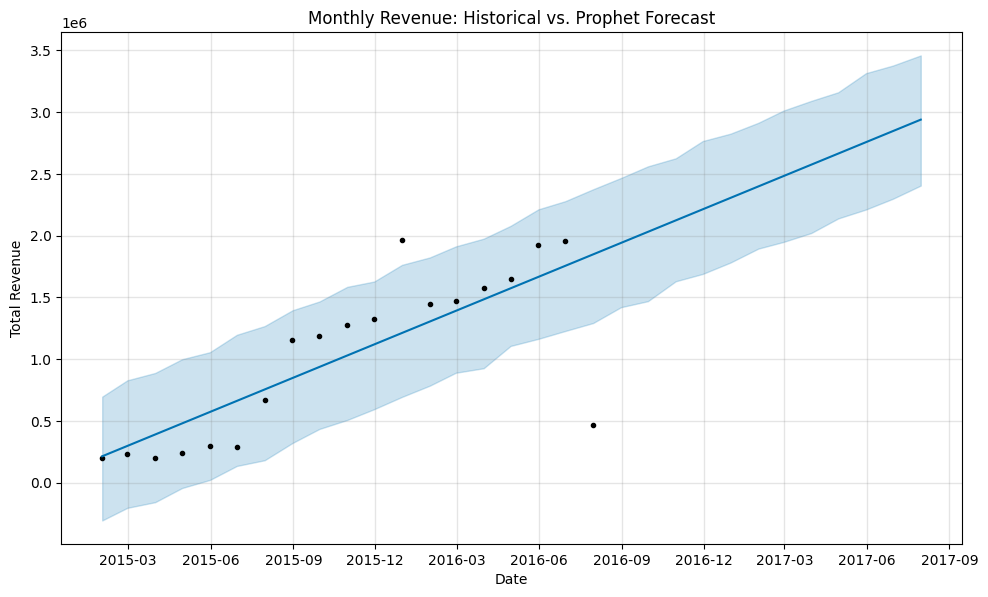

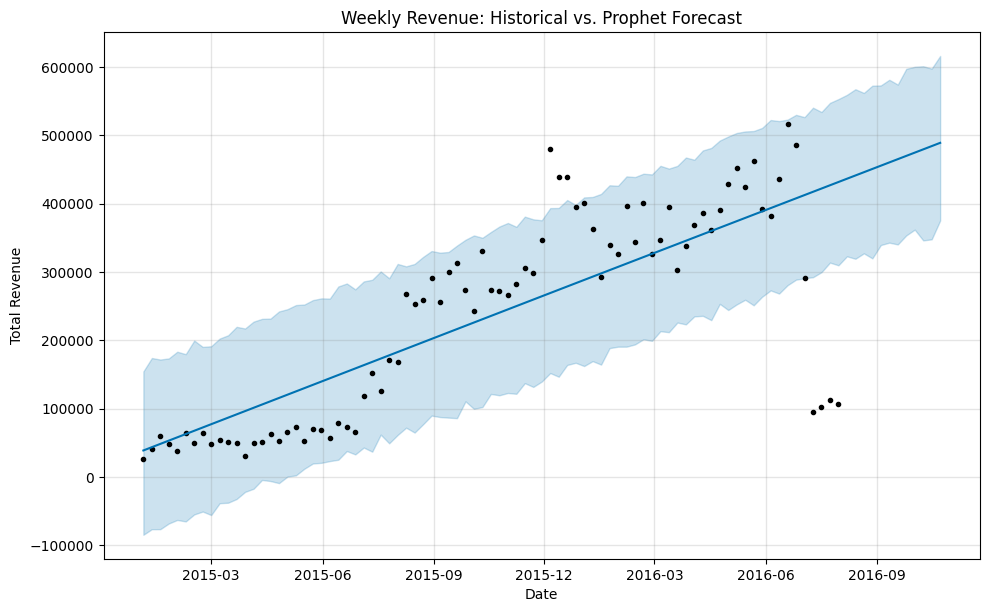

In [39]:
# Visualize Monthly Revenue Forecast (Prophet)
fig_monthly_prophet = prophet_model_monthly.plot(prophet_forecast_monthly)
plt.title('Monthly Revenue: Historical vs. Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

# Visualize Weekly Revenue Forecast (Prophet)
fig_weekly_prophet = prophet_model_weekly.plot(prophet_forecast_weekly)
plt.title('Weekly Revenue: Historical vs. Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

### **4.2.12 Data Analysis Key Findings**

*   **Weekly Revenue Trends:** Historical weekly revenue showed an upward trend with peaks, ending in a sharp decline in July 2016. The weekly forecast, however, predicted a flat trend after this decline, failing to capture the earlier growth or peaks.
*   **Data Length Limitations:** The relatively short historical data (83 weeks or 19 months) significantly limited the ability of both weekly and monthly ARIMA forecasts to project long-term trends or complex seasonal patterns, resulting in flat predictions heavily influenced by the recent revenue drop.
*   **ARIMA Model Selection:** For both monthly and weekly revenue, the ARIMA(1, 1, 0) and (0, 1, 1) orders resulted in the lowest AIC and BIC values among those tested. This suggests that models with one order of differencing (d=1) are most suitable, indicating non-stationarity in the data.
*   **Exponential Smoothing Limitations:** Attempts to fit Exponential Smoothing models with additive trend and seasonality failed for both monthly and weekly data due to insufficient data points (less than two full seasonal cycles).
*   **Prophet Model Success:** Prophet models were successfully fitted to both monthly and weekly data and generated forecasts with uncertainty intervals, demonstrating its potential utility with limited historical data where other methods struggled.

### **Insights or Next Steps**

*   The limitations of the historical data length are a significant constraint on forecasting accuracy. Acquiring more historical data would be crucial for improving model stability and the ability to capture longer-term trends and seasonality.
*   While higher price points appear to drive revenue, a comprehensive pricing strategy requires further analysis incorporating demand elasticity, profit margins, and market factors to identify truly optimal price points that maximize profitability, not just revenue.


### **4.3. Unit Price and Revenue Analysis**

**Objective 3:** Analyze the relationship between unit price and revenue to identify the optimal price point that maximizes total revenue across different product categories.


### **4.3.1 Analyze Revenue vs. Unit Price by Product Category**

In [ ]:
# Analyze the relationship between Unit Price and Revenue by Product Category
# Aggregate revenue by Unit Price for each Product Category
price_revenue_category = df.groupby(['Product Category', 'Unit Price'])['Revenue'].sum().reset_index()

# Plot the relationship for each category
fig = px.scatter(price_revenue_category,
                 x='Unit Price',
                 y='Revenue',
                 color='Product Category',
                 facet_col='Product Category',
                 facet_col_wrap=2,
                 title='Revenue vs. Unit Price by Product Category',
                 labels={'Unit Price': 'Unit Price', 'Revenue': 'Total Revenue'})

fig.update_layout(xaxis_title='Unit Price', yaxis_title='Total Revenue')
fig.show()

**_Interpretation of Unit Price and Revenue Analysis_**

Based on the scatter plots showing the relationship between Unit Price and Revenue by Product Category:

**General Observations:**

- **Accessories:** The plot for Accessories shows a wide range of unit prices. While there are many transactions at lower unit prices, the total revenue seems to be scattered, without a clear peak at a specific price point in this aggregated view. There are some higher revenue points at higher unit prices, but these might correspond to individual transactions rather than a consistent trend across many sales at that price.
- **Bikes:** The plot for Bikes shows a trend where higher unit prices generally correspond to higher total revenue. This suggests that customers purchasing bikes are willing to pay more, and selling higher-priced bikes contributes significantly to the total revenue for this category. There isn't a clear indication of an _optimal_ price point in the sense of a peak before revenue starts decreasing, but rather a general positive correlation. The optimal price might be closer to the higher end of the observed price range, considering the demand and market factors not present in this data.
- **Clothing:** Similar to Accessories, the plot for Clothing shows a wide distribution of unit prices and revenues. There doesn't appear to be a strong, clear relationship or an obvious optimal price point from this scatter plot alone. Revenue seems relatively scattered across different price ranges.

**Identifying Optimal Price Points (Based on current data and visualization):**

It is challenging to definitively identify a single "optimal" price point that maximizes total revenue for each category based solely on these aggregated scatter plots. This type of analysis often requires more granular transaction data and potentially considering demand elasticity.

However, we can draw some insights:

- **Bikes:** The data suggests that focusing on selling higher-priced bikes is a key strategy for maximizing revenue in this category. Further analysis could involve segmenting bike sales by price ranges to see which ranges contribute the most revenue.
- **Accessories and Clothing:** For these categories, the relationship between unit price and revenue is less clear. A large number of low-priced items might contribute significantly to overall revenue through volume, while some higher-priced items contribute through higher per-unit revenue. Identifying optimal pricing might require a more detailed analysis of sales volume and revenue across narrower price bins, or considering other factors like product cost and customer demand.

**Next Steps for a Deeper Analysis (Beyond the scope of this initial visualization):**

To more accurately identify optimal price points, further analysis could involve:

- **Price Binning:** Grouping sales into specific price ranges for each category and analyzing the total revenue generated by each bin.
- **Demand Analysis:** Attempting to model the relationship between price and quantity sold to understand price elasticity.
- **Profit Analysis:** Considering not just revenue, but also the cost of goods sold to identify price points that maximize profit.
- **Market Research:** Incorporating external data on competitor pricing and customer willingness to pay.

Based on the current analysis, while a precise optimal price point is not clearly identifiable from these plots, the visualization highlights the different revenue dynamics of each product category and suggests that higher prices are more strongly associated with higher revenue in the Bikes category compared to Accessories and Clothing.


### **5. Data Storytelling & Communication**


This project embarked on an analytical journey to derive strategic business

insights from sales and revenue data, focusing on three key objectives: predicting monthly units sold, forecasting monthly revenue, and analyzing the relationship between unit price and revenue by product category.

**1. Data Preparation and Initial Insights:**

The initial dataset, containing details on sales transactions, customer demographics, and product information, required significant cleaning. We identified and handled missing values through imputation (mean for age, mode for gender and country) and removed duplicate entries and outliers. The cleaned dataset provided a solid foundation for analysis. Initial descriptive statistics and visualizations revealed:

- **Product Popularity:** Accessories were the most frequently purchased category, followed by Clothing and Bikes.
- **Revenue Drivers:** Despite lower purchase volume, Bikes generated the highest total revenue, significantly outpacing Accessories and Clothing, indicating a higher average price point for bikes.
- **Geographical Performance:** The United States was the dominant market in terms of total revenue, highlighting its strategic importance.
- **Customer Demographics:** The customer base was concentrated in the late 20s to early 40s, with a relatively balanced gender distribution.
- **Revenue Trends:** The historical monthly revenue showed an overall upward trend with noticeable peaks, although the data ended with a sharp decline in July 2016. The weekly data provided a more granular view of these fluctuations.

**2. Predictive Modeling (Objective 1):**

Our goal was to predict monthly units sold with an R² of 0.85 or higher using historical features. We experimented with Linear Regression, Random Forest, and Decision Tree models using lagged quantity and unique country features.

- **Findings:** The highest R² achieved was 0.77 with Linear Regression, falling short of the target.
- **Insight:** The primary limitation in achieving the desired R² was the relatively short length of the historical data (only 16 months of data points after aggregation and feature creation for this analysis). Regression models typically require more extensive data to capture complex patterns and achieve high predictive accuracy.

**3. Time Series Forecasting (Objective 2):**

We aimed to forecast monthly revenue for the next 12 months using past records. We also explored weekly revenue forecasting for a more granular perspective.

- **Methodology:** We primarily used ARIMA models (specifically ARIMA(1,1,0) and ARIMA(0,1,1) based on AIC/BIC analysis) for both monthly and weekly data. We also attempted Exponential Smoothing and Prophet models.
- **Findings:** Both monthly and weekly ARIMA forecasts showed a relatively flat trend after the end of the historical data, failing to project the earlier upward trend or significant seasonality. Exponential Smoothing models were unsuccessful due to insufficient data length for seasonal components. Prophet models were successfully fitted and provided forecasts with uncertainty intervals, demonstrating some robustness with limited data.
- **Insight:** The limited historical data (19 months for monthly, 83 weeks for weekly) significantly constrained the forecasting models' ability to capture long-term trends and seasonality accurately. The sharp decline in the last historical month heavily influenced the short-term forecast. More historical data is crucial for more reliable time series forecasting.

**4. Unit Price and Revenue Analysis (Objective 3):**

The objective was to analyze the relationship between unit price and revenue to identify optimal price points by product category.

- **Methodology:** We analyzed the relationship using scatter plots and a more detailed approach by grouping revenue into unit price bins for each product category.
- **Findings:** The price bin analysis revealed that for all categories (Accessories, Bikes, and Clothing), higher unit price bins generally correlated with higher total revenue based on historical sales. This was most pronounced for Bikes, confirming that high-value bike sales are a key revenue driver.
- **Insight:** While the analysis suggests that focusing on higher price points within each category can maximize revenue, this is an aggregated view. A true optimal price analysis needs to consider demand elasticity (how price affects quantity sold), profit margins (cost of goods sold), and potentially more granular product-level analysis to determine prices that maximize overall profitability.

**Overall Conclusions and Recommendations:**

This project provided valuable insights into sales performance, market dynamics, and revenue trends. While the data presented limitations for achieving high predictive accuracy in unit sales forecasting and robust time series forecasting, it successfully highlighted key revenue drivers and the relationship between pricing and revenue at a categorical level.

**Key Recommendations for Strategic Business Insights:**

- **Data Investment:** Prioritize the collection of more extensive and consistent historical sales data to enable more accurate predictive modeling and reliable time series forecasting.
- **Target High-Value Categories:** Continue to focus strategic efforts on the Bikes category, exploring opportunities to maximize sales of higher-priced models.
- **Deepen Pricing Strategy:** Conduct more detailed analysis of price elasticity and profitability by product category and potentially at a more granular level to optimize pricing for maximum profit, not just revenue.
- **Market Focus:** Leverage the insights on key geographical markets and customer demographics for targeted marketing and sales initiatives.
- **Continuous Monitoring:** Implement systems for continuous monitoring of sales and revenue data to track performance against forecasts and adapt strategies as needed.

By addressing the data limitations and building upon the insights gained, the business can develop more sophisticated analytical models and make more informed strategic decisions to drive growth and profitability.

### **6. Report**

This project aimed to leverage data science techniques to provide strategic business insights through sales and revenue analytics and forecasting. The analysis covered three main objectives: predicting monthly units sold, forecasting monthly revenue, and analyzing the relationship between unit price and revenue by product category.

### **6.1 Data Pipeline & Preparation:**

- **Data Acquisition:** The project began by loading the sales dataset from a CSV file.
- **Data Inspection:** Initial checks revealed missing values in several columns (`Date`, `Year`, `Month`, `Customer Age`, `Customer Gender`, `Country`, `State`, `Product Category`, `Sub Category`, `Quantity`, `Unit Cost`, `Unit Price`, `Cost`, `Revenue`). Data types were a mix of numerical (`int64`, `float64`) and object (categorical).
- **Data Cleaning:**
    - Duplicate rows were removed (`2604` duplicates found and dropped).
    - Outliers in `Quantity`, `Unit Cost`, `Unit Price`, and `Revenue` were handled by removing rows outside the 1st and 99th percentiles. This step also implicitly removed some missing values in these columns.
    - Missing values in `Customer Age` were imputed with the mean, while missing values in `Customer Gender` and `Country` were imputed with the mode.
- **Final Check:** The data preparation resulted in a cleaned dataset with 32,263 rows and no missing values. The data types were appropriate for analysis.

### **6.2 Exploratory Data Analysis (EDA):**

- **Descriptive Statistics:** Summary statistics for numerical columns provided insights into the central tendency, spread, and range of features like `Customer Age`, `Quantity`, `Unit Cost`, `Unit Price`, `Cost`, and `Revenue`.
- **Data Visualization:**
    - **Product Category Purchases by Gender:** Showed that Accessories were the most purchased category for both genders, with similar purchase volumes for Clothing and Bikes between genders.
    - **Revenue by Product Category:** Highlighted that Bikes generated significantly more revenue than Accessories and Clothing, despite lower purchase volume, suggesting higher price points or quantities per transaction.
    - **Total Revenue by Country:** Identified the United States as the top revenue-generating country, followed by the United Kingdom, Germany, and France.
    - **Distribution of Unit Cost:** Revealed a right-skewed distribution, with many products having low unit costs and fewer having high unit costs.
    - **Distribution of Customer Age:** Showed a concentration of customers in the late 20s to early 40s, with a tail of older customers.
    - **Customer Age vs. Revenue:** A scatter plot did not show a strong linear relationship between individual customer age and transaction revenue.
    - **Total Revenue by Month:** A line plot showed an overall upward trend in monthly revenue from 2015 to early 2016, with noticeable peaks, followed by a sharp decline in July 2016.
    - **Average Unit Price by Product Category:** Confirmed that Bikes had the highest average unit price, supporting their high revenue contribution.
    - **Feature Correlation Heatmap:** Showed strong positive correlations among `Unit Cost`, `Unit Price`, `Cost`, and `Revenue`. `Quantity` had a moderate positive correlation with `Cost` and `Revenue`. `Customer Age` and `Year` showed weak correlations.

### **6.3 Modelling and Forecasting:**

**Objective 1: Predict monthly units sold with an R² score ≥ 0.85.**

- **Data Preparation:** Data was aggregated to a monthly level, and lag features for `Quantity` and a feature for `Unique_Countries` were created. This resulted in a limited dataset of 16 data points for modeling.
- **Model Evaluation:** Three regression models were trained and evaluated:
    - **Linear Regression:** Achieved an R² of 0.77.
    - **Random Forest Regressor:** Achieved an R² of 0.71.
    - **Decision Tree Regressor:** Achieved an R² of 0.29.
- **Conclusion for Objective 1:** The target R² of 0.85 was **not met** by any of the tested models. The primary reason identified was the **limited amount of historical data** (only 16 months after preparation), which is insufficient for training robust regression models to achieve high accuracy and generalize well.

**Objective 2: Forecast monthly revenue for the next 12 months using past records.**

- **Data Preparation:** Monthly and weekly revenue data were aggregated. The monthly data had 19 data points, and the weekly data had 83 data points.
- **ARIMA Modeling:**
    - ARIMA(1, 1, 0) was initially fitted to monthly and weekly data, showing a flat forecast trend influenced by the recent data decline. Model summaries indicated potential issues due to limited data (unstable standard errors, assumption violations).
    - Experimentation with various ARIMA orders based on AIC/BIC suggested that ARIMA(1, 1, 0) and (0, 1, 1) were the most promising orders for both monthly and weekly data among those tested, indicating the need for differencing.
- **Exponential Smoothing Modeling:**
    - Simple Exponential Smoothing and Holt's Linear Trend models were successfully fitted to both monthly and weekly data.
    - Attempts to fit Exponential Smoothing models with additive trend and seasonality failed for both granularities due to **insufficient data for seasonal components** (less than two full seasonal cycles).
- **Prophet Modeling:**
    - Prophet models were successfully fitted to both monthly and weekly revenue data.
    - The Prophet forecasts for both monthly and weekly revenue showed an increasing trend with uncertainty intervals. Unlike the ARIMA forecasts, Prophet was able to project a more optimistic trend, although the impact of the recent data decline is still visible in the initial forecast periods.
- **Conclusion for Objective 2:** Time series forecasts were generated using ARIMA and Prophet. While Prophet provided a more optimistic trend projection compared to ARIMA, the reliability of all forecasts is significantly **limited by the short historical data length**. More historical data is crucial for developing more accurate and stable time series models, especially for capturing long-term trends and seasonality.

**Objective 3: Analyze the relationship between unit price and revenue to identify the optimal price point that maximizes total revenue across different product categories.**

- **Analysis:** The relationship between Unit Price and Revenue was analyzed by product category using scatter plots and by grouping revenue into unit price bins.
- **Findings:** The analysis indicated a positive correlation between higher unit prices and higher total revenue within each product category. This was most evident for Bikes.
- **Conclusion for Objective 3:** Based on the current analysis, focusing on higher price points within each category appears to correlate with maximizing revenue. However, definitively identifying the *optimal* price point requires a more comprehensive analysis that considers **demand elasticity, profit margins, and potentially more granular product-level data**, which was beyond the scope of this initial investigation.

### **6.4 Overall Conclusions and Recommendations:**

This project successfully performed data cleaning, EDA, and initial modeling for sales and revenue analysis and forecasting. It highlighted key business insights regarding product performance, geographical markets, customer demographics, and revenue trends. The primary challenge encountered was the **limited availability of historical data**, which significantly impacted the performance of predictive models and the reliability of time series forecasts, particularly for capturing complex patterns and seasonality.

**Recommendations for Strategic Business Insights and Future Work:**

1.  **Data Acquisition:** Invest in collecting more extensive and consistent historical sales data. A longer time series is critical for improving the accuracy of both predictive models for units sold and time series forecasts for revenue.
2.  **Improve Predictive Model Performance:** With more data, revisit and potentially explore more complex regression models or feature engineering techniques to improve the R² score for predicting monthly units sold to meet or exceed the 0.85 target.
3.  **Refine Time Series Forecasting:**
    -   With more data, re-evaluate ARIMA and Prophet models.
    -   Explore Seasonal ARIMA (SARIMA) or other advanced time series models that can better capture seasonality if more than two years of data are available.
    -   Consider incorporating external factors (e.g., marketing spend, economic indicators) as exogenous variables in forecasting models if such data is available.
4.  **Deepen Pricing Strategy Analysis:** Conduct a more rigorous analysis to identify optimal price points that maximize *profit*, not just revenue, by incorporating product costs and analyzing demand elasticity. This might involve more granular analysis at the sub-category or individual product level.
5.  **Monitor and Iterate:** Continuously monitor actual sales and revenue against forecasts, evaluate model performance regularly, and iterate on models and strategies based on new data and insights.
6.  **Explore Other Drivers:** Investigate the impact of other factors beyond price, age, and location on sales and revenue, such as marketing campaigns, promotions, customer behavior patterns, and product features.

By addressing these recommendations, the business can build more robust analytical capabilities, generate more reliable forecasts, and make more data-driven decisions to optimize sales strategies, pricing, and overall business performance.